In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose
matplotlib.rcParams['figure.figsize'] = [15.0, 6.0]

In [294]:
startup_funding = pd.read_csv('../startup_funding.csv')
startup_funding.head(3)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN


#### Check for missing values

In [295]:
startup_funding.isna().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

#### Impute missing values in AmountInUSD with median of the column

In [296]:
startup_funding['AmountInUSD'] = startup_funding['AmountInUSD'].astype(str)
startup_funding['AmountInUSD'] = startup_funding['AmountInUSD'].apply(lambda x:x.replace(',',''))
startup_funding['AmountInUSD'] = startup_funding['AmountInUSD'].astype('float')
startup_funding.AmountInUSD = pd.to_numeric(startup_funding.AmountInUSD)
startup_funding['AmountInUSD'].fillna((startup_funding['AmountInUSD'].median()), inplace=True)
startup_funding.AmountInUSD = pd.to_numeric(startup_funding.AmountInUSD).astype('int')
startup_funding.AmountInUSD

0       1300000
1       1070000
2       1070000
3        500000
4        850000
         ...   
2367    4500000
2368     825000
2369    1500000
2370    1070000
2371     140000
Name: AmountInUSD, Length: 2372, dtype: int32

#### Check missing values count

In [297]:
startup_funding.isna().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD            0
Remarks             1953
dtype: int64

In [298]:
startup_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       2372 non-null   int32 
 9   Remarks           419 non-null    object
dtypes: int32(1), int64(1), object(8)
memory usage: 176.2+ KB


#### Treat and Convert Date column data type to datetime

In [299]:

for i in range(len(startup_funding)):
    count_slash = startup_funding.loc[i, 'Date'].count('/')
    if count_slash != 2:

        if '.' in startup_funding.loc[i,'Date']:
            startup_funding.loc[i,'Date'] = startup_funding.loc[i,'Date'].replace('.', '/')

        if '//' in startup_funding.loc[i,'Date']:
            startup_funding.loc[i,'Date'] = startup_funding.loc[i,'Date'].replace('//', '/')


startup_funding.Date = pd.to_datetime(startup_funding.Date.apply(str))

In [300]:
# convert date column to index

startup_funding = startup_funding.set_index('Date')
startup_funding = startup_funding.sort_index()
startup_funding.head(2)

,SNo,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
Date,,,,,,,,,
2015-01-05,2080,Foodpanda,Online Food Delivery,NaN,Gurgaon,"Goldman Sachs, Rocket Internet",Private Equity,100000000,Series D
2015-01-05,2081,Termsheet,Fund Raising Platform,NaN,Chennai,"Anand Vijay, Nipun Dureja, Satyajit Heeralal, ...",Seed Funding,100000,NaN


#### Create additional columns Month, Year and Date 

In [301]:
startup_funding['day'] = startup_funding.index.day
startup_funding['month'] = startup_funding.index.month
startup_funding['year'] = startup_funding.index.year
startup_funding.head(2)

,SNo,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,day,month,year
Date,,,,,,,,,,,,
2015-01-05,2080,Foodpanda,Online Food Delivery,NaN,Gurgaon,"Goldman Sachs, Rocket Internet",Private Equity,100000000,Series D,5,1,2015
2015-01-05,2081,Termsheet,Fund Raising Platform,NaN,Chennai,"Anand Vijay, Nipun Dureja, Satyajit Heeralal, ...",Seed Funding,100000,NaN,5,1,2015


#### Total number of fundings done in each year.

In [302]:
total_fundings_year = startup_funding.groupby('year').count()['AmountInUSD']
total_fundings_year.head()

year
2015    936
2016    993
2017    443
Name: AmountInUSD, dtype: int64

### Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis

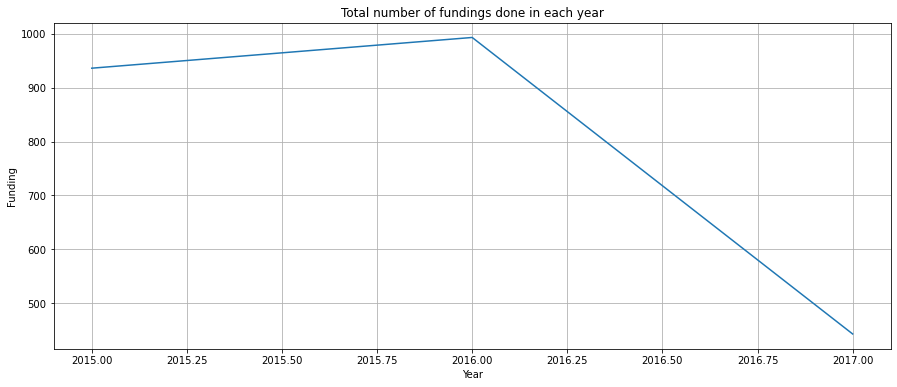

In [303]:
fig = plt.subplots()
plt.plot(total_fundings_year.index, total_fundings_year.values)
plt.xlabel('Year')
plt.ylabel('Funding')
plt.title('Total number of fundings done in each year')
plt.grid()
plt.show()


#### Print year-wise total number of fundings

In [304]:
year_total_funding = startup_funding.groupby('year').sum()
year_total_funding = year_total_funding.drop(['SNo', 'day','month'], axis=1)


In [305]:
year_total_funding['AmountInUSD'] = year_total_funding['AmountInUSD'].astype('int64')
year_total_funding

,AmountInUSD
year,
2015,8974762368
2016,4263578608
2017,6015335500


## Problem 2: Top Indian Cities

In [306]:
startup_funding.head(2)

,SNo,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,day,month,year
Date,,,,,,,,,,,,
2015-01-05,2080,Foodpanda,Online Food Delivery,NaN,Gurgaon,"Goldman Sachs, Rocket Internet",Private Equity,100000000,Series D,5,1,2015
2015-01-05,2081,Termsheet,Fund Raising Platform,NaN,Chennai,"Anand Vijay, Nipun Dureja, Satyajit Heeralal, ...",Seed Funding,100000,NaN,5,1,2015


In [307]:
# convert to uppercase
# split cities separated by '/' into multiple rows
startup_funding['CityLocation'] = startup_funding['CityLocation'].str.strip()
startup_funding['CityLocation'] = startup_funding['CityLocation'].str.upper()
startup_funding = startup_funding.assign(CityLocation=startup_funding['CityLocation'].str.split('/')).explode('CityLocation')
startup_funding['CityLocation'] = startup_funding['CityLocation'].apply(lambda x:x.replace('DELHI', 'NEW DELHI') if x == 'DELHI' else x)
startup_funding['CityLocation'] = startup_funding['CityLocation'].str.strip()

print(list(pd.unique(startup_funding['CityLocation'])))

['GURGAON', 'CHENNAI', 'NEW DELHI', 'HYDERABAD', 'MUMBAI', 'BANGALORE', 'PUNE', 'CHANDIGARH', 'SINGAPORE', 'JAIPUR', nan, 'UDAIPUR', 'US', 'AHMEDABAD', 'NOIDA', 'VADODARA', 'USA', 'INDIA', 'DALLAS', 'GWALIOR', 'KOLKATA', 'UDUPI', 'SFO', 'GOA', 'NAGPUR', 'CALIFORNIA', 'BHOPAL', 'COIMBATORE', 'GLOBAL', 'KANPUR', 'SAN MATEO', 'BANGKOK', 'HOUSTON', 'NEW YORK', 'BELGAUM', 'BOSTON', 'PALO ALTO', 'NY', 'INDORE', 'UK', 'SILIGURI', 'JODHPUR', 'SEATTLE', 'DUBAI', 'KOCHI', 'VARANASI', 'TRIVANDRUM', 'LUCKNOW', 'KERALA', 'LONDON', 'KOZHIKODE', 'AGRA', 'HUBLI', 'KARUR', 'MISSOURIE', 'PANAJI', 'SURAT']


In [308]:
# missing values in CityLocation
print(startup_funding.CityLocation.isna().sum())

# replace missing values by fixed string 'Unknown'
startup_funding['CityLocation'].fillna('Unknown', inplace=True)
print(startup_funding.CityLocation.isna().sum())

179
0


#### Find out which cities are generally chosen for starting a startup.

In [309]:
cities_most_startup = startup_funding.groupby('CityLocation').count().sort_values(by='StartupName', ascending=False)
cities_most_startup = cities_most_startup.loc[:, cities_most_startup.columns.intersection(['StartupName'])]
cities_most_startup.head()

,StartupName
CityLocation,
BANGALORE,637
MUMBAI,449
NEW DELHI,389
GURGAON,241
Unknown,179


#### Find top 10 Indian cities which have most number of startups ?

In [310]:
top_10_cities = cities_most_startup.head(11)
top_10_cities = top_10_cities.drop('Unknown', axis=0)
top_10_cities

,StartupName
CityLocation,
BANGALORE,637
MUMBAI,449
NEW DELHI,389
GURGAON,241
PUNE,91
NOIDA,79
HYDERABAD,79
CHENNAI,67
AHMEDABAD,35


#### Plot a pie chart to visualize it

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


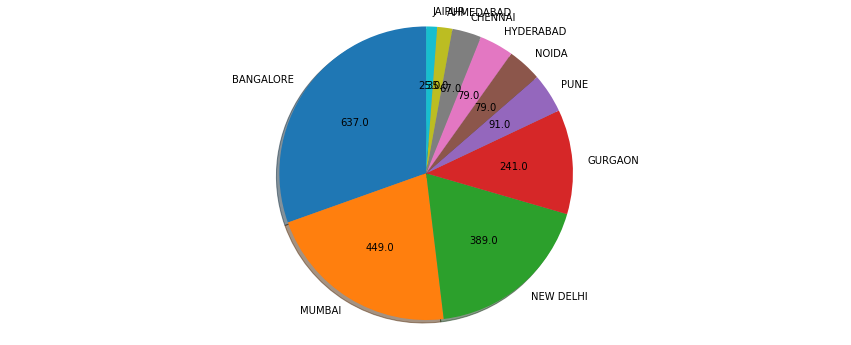

In [311]:
labels = list(top_10_cities.index)
sizes = list(top_10_cities.values)
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

def absolute_value(val):
    a  = np.round(val/100.*sum(sizes), 0)
    return a[0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=absolute_value,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Problem 3: Funding amount


### Find top 10 Indian cities with most amount of fundings received. 

In [312]:
amount_cities = startup_funding.groupby('CityLocation').sum()
amount_cities = amount_cities.loc[:, amount_cities.columns.intersection(['AmountInUSD'])]
amount_cities = amount_cities.astype('Int64')
amount_cities = amount_cities.sort_values(by='AmountInUSD', ascending=False)
amount_cities.head(10)

,AmountInUSD
CityLocation,
BANGALORE,8665354108
NEW DELHI,3004427500
MUMBAI,2511154500
GURGAON,2149271500
Unknown,1318943868
CHENNAI,432505000
PUNE,399823000
HYDERABAD,222042000
NOIDA,205948000


In [313]:
indian_cities = ['GURGAON', 'CHENNAI', 'NEW DELHI', 'HYDERABAD', 'MUMBAI', 'BANGALORE', 'PUNE', 'CHANDIGARH', 'JAIPUR', 'UDAIPUR', 'AHMEDABAD', 'NOIDA', 'VADODARA', 'INDIA', 'GWALIOR', 'KOLKATA', 'UDUPI', 'GOA', 'NAGPUR', 'BHOPAL', 'COIMBATORE', 'KANPUR', 'BELGAUM', 'INDORE', 'SILIGURI', 'JODHPUR', 'KOCHI', 'VARANASI', 'TRIVANDRUM', 'LUCKNOW', 'KERALA', 'LONDON', 'KOZHIKODE', 'AGRA', 'HUBLI', 'PANAJI', 'SURAT']

for city in amount_cities.index:
    city = city.strip()
    if not city in indian_cities:
        amount_cities.drop(city, inplace=True)

#### Indian cities only

In [314]:
amount_cities = amount_cities.sort_values(by='AmountInUSD', ascending=False).head(10)
amount_cities

,AmountInUSD
CityLocation,
BANGALORE,8665354108
NEW DELHI,3004427500
MUMBAI,2511154500
GURGAON,2149271500
CHENNAI,432505000
PUNE,399823000
HYDERABAD,222042000
NOIDA,205948000
AHMEDABAD,108886000


#### Find out percentage of funding each city has got (among top 10 Indian cities only)

In [315]:
amount_cities['percent'] = (amount_cities['AmountInUSD'] / amount_cities['AmountInUSD'].sum()) * 100
amount_cities['percent'] = amount_cities['percent'].apply(lambda x:round(x,2))
amount_cities

,AmountInUSD,percent
CityLocation,,
BANGALORE,8665354108,48.81
NEW DELHI,3004427500,16.92
MUMBAI,2511154500,14.15
GURGAON,2149271500,12.11
CHENNAI,432505000,2.44
PUNE,399823000,2.25
HYDERABAD,222042000,1.25
NOIDA,205948000,1.16
AHMEDABAD,108886000,0.61


## Problem 4 : Investment Type

### Find out percentage of amount funded for each investment type.

In [316]:
print(list(pd.unique(startup_funding['InvestmentType'])))
startup_funding['InvestmentType'] = startup_funding['InvestmentType'].apply(lambda x:x.replace('PrivateEquity', 'Private Equity') if x == 'PrivateEquity' else x)
startup_funding['InvestmentType'] = startup_funding['InvestmentType'].apply(lambda x:x.replace('SeedFunding', 'Seed Funding') if x == 'SeedFunding' else x)
startup_funding['InvestmentType'] = startup_funding['InvestmentType'].apply(lambda x:x.replace('Crowd funding', 'Crowd Funding') if x == 'Crowd funding' else x)
print(list(pd.unique(startup_funding['InvestmentType'])))

['Private Equity', 'Seed Funding', 'SeedFunding', 'PrivateEquity', 'Crowd Funding', 'Crowd funding', nan, 'Debt Funding']
['Private Equity', 'Seed Funding', 'Crowd Funding', nan, 'Debt Funding']


#### Print the investment type in descending order with respect to the percentage of the amount funded.

In [317]:
investment = startup_funding.groupby('InvestmentType').sum()
investment = investment.loc[:, investment.columns.intersection(['AmountInUSD'])]
investment = investment.astype('Int64')
investment['percent'] = (investment['AmountInUSD'] / investment['AmountInUSD'].sum()) * 100
investment['percent'] = investment['percent'].apply(lambda x:round(x,2))
investment = investment.sort_values(by='AmountInUSD', ascending=False)
investment

,AmountInUSD,percent
InvestmentType,,
Private Equity,18516355000,94.86
Seed Funding,995005708,5.10
Debt Funding,7800000,0.04
Crowd Funding,155768,0.00


## Problem 5 : Top Industries

In [320]:
startup_funding['IndustryVertical'] = startup_funding['IndustryVertical'].str.upper()
industry = startup_funding.groupby('IndustryVertical').sum()
industry = industry.loc[:, industry.columns.intersection(['AmountInUSD'])]
industry = industry.astype('Int64')
industry['percent'] = (industry['AmountInUSD'] / industry['AmountInUSD'].sum()) * 100
industry['percent'] = industry['percent'].apply(lambda x:round(x,2))
industry = industry.sort_values(by='AmountInUSD', ascending=False)
industry

,AmountInUSD,percent
IndustryVertical,,
ECOMMERCE,4379859608,24.00
CONSUMER INTERNET,4134669000,22.66
TECHNOLOGY,1264773500,6.93
ONLINE MARKETPLACE,700000000,3.84
E-COMMERCE & M-COMMERCE PLATFORM,680000000,3.73
...,...,...
FOOD ORDERING & DELIVERY APP,77000,0.00
RAW MEAT & READY TO EAT FOOD ETAILER,77000,0.00
DEVELOPER PORTFOLIO SHOWCASE PLATFORM,70000,0.00


#### Top 5 industries and percentage of the total amount funded to that industry

In [323]:
top5_industry = industry.drop('AmountInUSD', axis=1).head(5)
top5_industry

,percent
IndustryVertical,
ECOMMERCE,24.00
CONSUMER INTERNET,22.66
TECHNOLOGY,6.93
ONLINE MARKETPLACE,3.84
E-COMMERCE & M-COMMERCE PLATFORM,3.73


## Problem 6 : Top startups

### Find top 5 startups with most amount of total funding.

In [324]:
startup_funding.head(2)

,SNo,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,day,month,year
Date,,,,,,,,,,,,
2015-01-05,2080,Foodpanda,ONLINE FOOD DELIVERY,NaN,GURGAON,"Goldman Sachs, Rocket Internet",Private Equity,100000000,Series D,5,1,2015
2015-01-05,2081,Termsheet,FUND RAISING PLATFORM,NaN,CHENNAI,"Anand Vijay, Nipun Dureja, Satyajit Heeralal, ...",Seed Funding,100000,NaN,5,1,2015


In [328]:

startup_funding['StartupName'] = startup_funding['StartupName'].str.upper()
startup_funding['StartupName'] = startup_funding['StartupName'].str.strip()
# print(list(pd.unique(startup_funding['StartupName'])))
startup_funding['StartupName'] = startup_funding['StartupName'].apply(lambda x:x.replace('PAYTM MARKETPLACE', 'PAYTM') if x == 'PAYTM MARKETPLACE' else x)
startup_funding['StartupName'] = startup_funding['StartupName'].apply(lambda x:x.replace('FLIPKART.COM', 'FLIPKART') if x == 'FLIPKART.COM' else x)
startup_funding['StartupName'] = startup_funding['StartupName'].apply(lambda x:x.replace('OYOROOMS', 'OYO') if x == 'OYOROOMS' else x)
startup_funding['StartupName'] = startup_funding['StartupName'].apply(lambda x:x.replace('OYO ROOMS', 'OYO') if x == 'OYO ROOMS' else x)
startup_funding['StartupName'] = startup_funding['StartupName'].apply(lambda x:x.replace('OYOFIT', 'OYO') if x == 'OYOFIT' else x)
startup_funding['StartupName'] = startup_funding['StartupName'].apply(lambda x:x.replace('OLA CABS', 'OLA') if x == 'OLA CABS' else x)
startup_funding['StartupName'] = startup_funding['StartupName'].apply(lambda x:x.replace('OLACABS', 'OLA') if x == 'OLACABS' else x)


In [333]:
funding = startup_funding.groupby('StartupName').sum()
funding = funding.loc[:, funding.columns.intersection(['AmountInUSD'])]
funding = funding.astype('Int64')
funding = funding.sort_values(by='AmountInUSD', ascending=False)
funding = funding.head()
funding

,AmountInUSD
StartupName,
PAYTM,2342140000
FLIPKART,2259700000
OLA,1900570000
SNAPDEAL,700000000
OYO,638070000


In [335]:
for sn in funding.index:
    print(sn)

PAYTM
FLIPKART
OLA
SNAPDEAL
OYO


## Problem 7: Funding rounds

### Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

In [341]:
funding_time = startup_funding.groupby('StartupName').count()
funding_time = funding_time.loc[:, funding.columns.intersection(['AmountInUSD'])]
funding_time = funding_time.astype('Int64')
funding_time = funding_time.sort_values(by='AmountInUSD', ascending=False)
funding_time = funding_time.rename(columns={'AmountInUSD':'Funding_Received_Count'})
funding_time = funding_time.head()
funding_time

,Funding_Received_Count
StartupName,
OLA,9
SWIGGY,7
OYO,7
PAYTM,6
URBANCLAP,6


## Problem 8 : Top Investor

In [342]:
startup_funding.head(2)

,SNo,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,day,month,year
Date,,,,,,,,,,,,
2015-01-05,2080,FOODPANDA,ONLINE FOOD DELIVERY,NaN,GURGAON,"Goldman Sachs, Rocket Internet",Private Equity,100000000,Series D,5,1,2015
2015-01-05,2081,TERMSHEET,FUND RAISING PLATFORM,NaN,CHENNAI,"Anand Vijay, Nipun Dureja, Satyajit Heeralal, ...",Seed Funding,100000,NaN,5,1,2015


In [343]:
startup_funding['InvestorsName'] = startup_funding['InvestorsName'].str.strip()
startup_funding['InvestorsName'] = startup_funding['InvestorsName'].str.upper()
startup_funding = startup_funding.assign(InvestorsName=startup_funding['InvestorsName'].str.split(',')).explode('InvestorsName')
startup_funding['InvestorsName'] = startup_funding['InvestorsName'].str.strip()
startup_funding.head()

,SNo,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,day,month,year
Date,,,,,,,,,,,,
2015-01-05,2080,FOODPANDA,ONLINE FOOD DELIVERY,NaN,GURGAON,GOLDMAN SACHS,Private Equity,100000000,Series D,5,1,2015
2015-01-05,2080,FOODPANDA,ONLINE FOOD DELIVERY,NaN,GURGAON,ROCKET INTERNET,Private Equity,100000000,Series D,5,1,2015
2015-01-05,2081,TERMSHEET,FUND RAISING PLATFORM,NaN,CHENNAI,ANAND VIJAY,Seed Funding,100000,NaN,5,1,2015
2015-01-05,2081,TERMSHEET,FUND RAISING PLATFORM,NaN,CHENNAI,NIPUN DUREJA,Seed Funding,100000,NaN,5,1,2015
2015-01-05,2081,TERMSHEET,FUND RAISING PLATFORM,NaN,CHENNAI,SATYAJIT HEERALAL,Seed Funding,100000,NaN,5,1,2015


### Find the Investors who have invested maximum number of times.

In [346]:
investors = startup_funding.groupby('InvestorsName').count()
investors = investors.loc[:, investors.columns.intersection(['StartupName'])]
investors = investors.sort_values(by='StartupName', ascending=False)
investors.head()

,StartupName
InvestorsName,
UNDISCLOSED INVESTORS,73
SEQUOIA CAPITAL,64
ACCEL PARTNERS,53
KALAARI CAPITAL,44
SAIF PARTNERS,43
